In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Student Performance Analytics Dashboard

Problem Statement:

Institutions need early warnings for students who might fail or
drop out.

Objective:

Analyze student data to highlight performance trends and risk
areas.

Requirements:

Dataset: marks, attendance, logins

Calculate averages, correlation, and absentee impact

Visualize top vs struggling students

Use bar charts, heatmaps

Expected Outcome:

Dashboard to support academic interventions for at-risk
students.

In [3]:
df.columns.tolist()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
top_students = df.nlargest(10, 'Exam_Score')
struggling_students = df.nsmallest(10, 'Exam_Score')
struggling_students

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1101,3,62,Medium,Low,No,6,67,Medium,Yes,1,Low,Medium,Public,Negative,3,No,High School,Near,Male,55
5507,5,65,Low,High,No,7,71,Medium,Yes,0,Low,Medium,Private,Negative,2,No,College,Far,Male,56
2880,7,66,High,Low,Yes,8,68,High,Yes,0,Low,Medium,Public,Negative,2,Yes,College,Moderate,Male,57
3543,14,67,Low,Low,Yes,7,66,Low,Yes,0,Low,Medium,Public,Neutral,4,No,High School,Far,Female,57
5719,9,64,Medium,Low,Yes,10,68,Low,Yes,0,Medium,Medium,Private,Negative,3,No,High School,Near,Male,57
5907,3,60,Medium,Low,Yes,6,78,Low,Yes,1,Low,Medium,Public,Positive,1,No,Postgraduate,Near,Female,57
668,4,69,Medium,Low,No,9,93,Low,No,2,Medium,High,Private,Negative,3,No,High School,Moderate,Female,58
1210,13,61,High,Low,No,7,68,Low,No,1,Medium,Medium,Public,Neutral,2,No,High School,Near,Male,58
1750,4,61,Low,High,Yes,7,71,High,Yes,0,Low,Low,Public,Positive,1,No,Postgraduate,Near,Male,58
2533,14,61,Medium,Medium,No,5,82,Low,No,0,Low,Medium,Public,Neutral,0,No,High School,Near,Female,58


In [7]:
df.fillna({
    'Teacher_Quality': df['Teacher_Quality'].mode()[0],
    'Parental_Education_Level': df['Parental_Education_Level'].mode()[0],
    'Distance_from_Home': df['Distance_from_Home'].mode()[0]
}, inplace=True)


In [8]:
def risk_level(score):
    if score < 40:
        return 'High Risk'
    elif score < 60:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df['Exam_Score'].apply(risk_level)

In [10]:
df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']].mean()

Hours_Studied      19.975329
Attendance         79.977448
Sleep_Hours         7.029060
Previous_Scores    75.070531
Exam_Score         67.235659
dtype: float64

In [9]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

Text(0.5, 1.0, 'Attendance vs Exam Score by Gender')

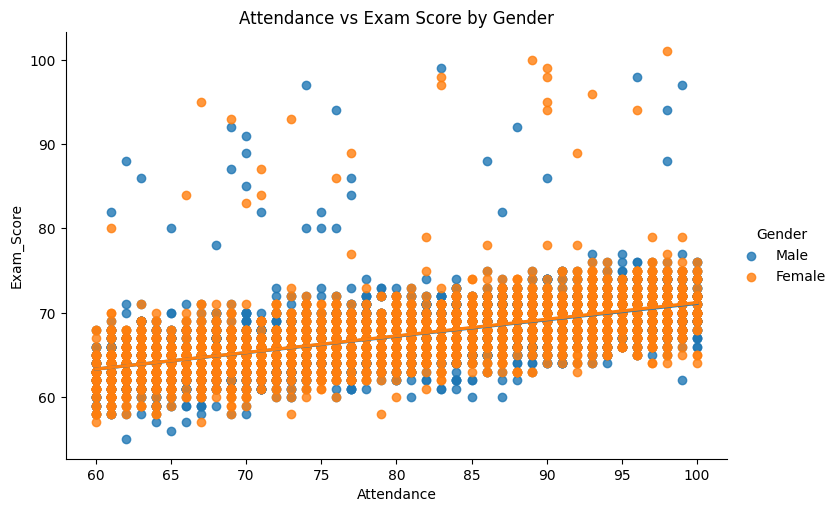

In [11]:
sns.lmplot(data=df, x='Attendance', y='Exam_Score', hue='Gender', aspect=1.5, height=5)
plt.title('Attendance vs Exam Score by Gender')

<Axes: >

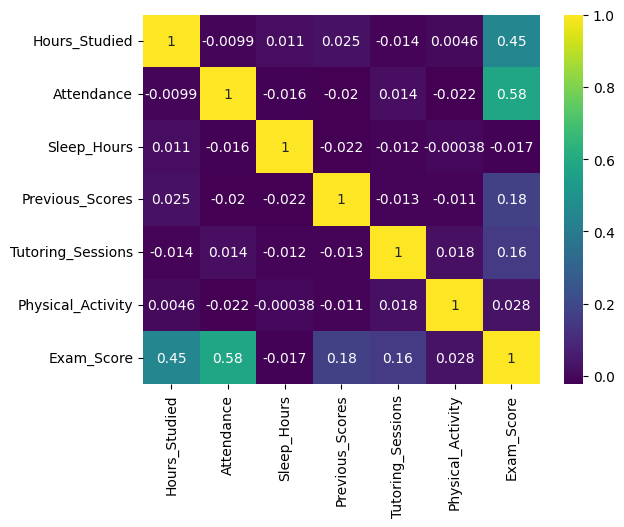

In [9]:
df_numeric = df.select_dtypes(include='number')
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis')

In [12]:
df['Performance_Level'] = pd.qcut(df['Exam_Score'], q=3, labels=['Struggling', 'Average', 'Top'])
df['Performance_Level'].value_counts()

Performance_Level
Struggling    2882
Average       2100
Top           1625
Name: count, dtype: int64

Text(0.5, 1.0, 'Student Count by Performance Level')

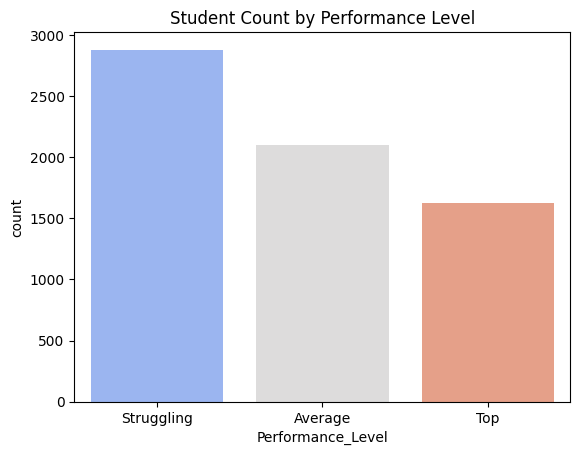

In [13]:
sns.countplot(data=df, x='Performance_Level', palette='coolwarm')
plt.title('Student Count by Performance Level')

Text(0.5, 1.0, 'Motivation Level vs Exam Score')

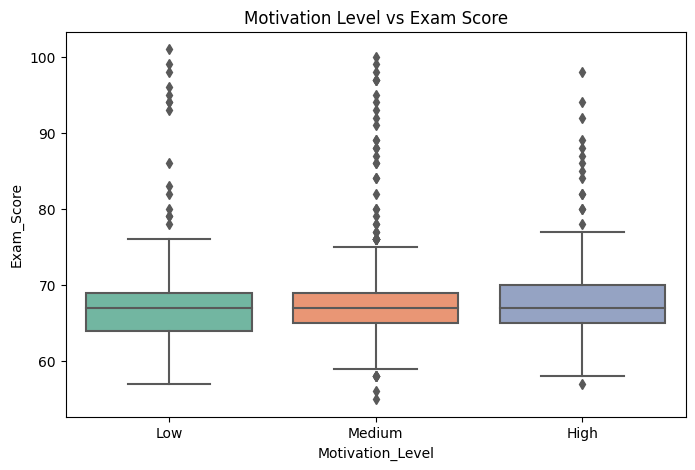

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Motivation_Level', y='Exam_Score', palette='Set2')
plt.title('Motivation Level vs Exam Score')

Text(0.5, 1.0, 'Access to Learning Resources vs Exam Score')

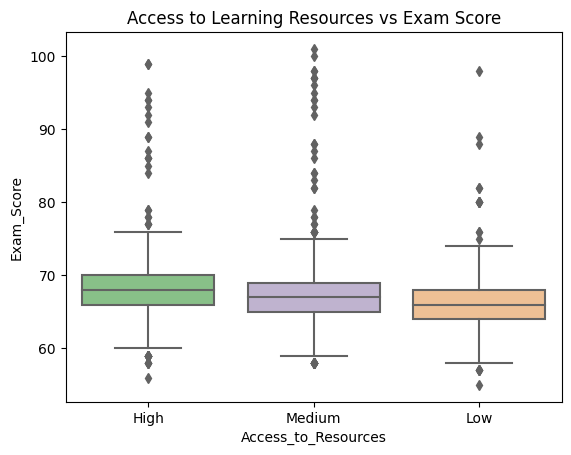

In [15]:
sns.boxplot(data=df, x='Access_to_Resources', y='Exam_Score', palette='Accent')
plt.title('Access to Learning Resources vs Exam Score')

In [16]:
df.groupby('Performance_Level')[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Sleep_Hours', 'Exam_Score']].mean()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Sleep_Hours,Exam_Score
Performance_Level,,,,,,
Struggling,17.340389,72.339695,72.667245,1.303262,7.032269,64.029146
Average,20.574762,82.717619,75.503333,1.550000,7.025238,67.955714
Top,23.873846,89.982154,78.773538,1.758769,7.028308,71.992000
